In [66]:
import os
import csv
from StringIO import StringIO
import time
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
 
fileDir = os.path.dirname(os.path.realpath('__file__'))
 
## Module Constants
APP_NAME = "Project_DeathRow"
EXEC_DB_DIR = "\execution_database.csv"
ALAB_DB_DIR = "\Crime_Alabama.csv"
ARIZ_DB_DIR = "\Crime_Arizona.csv"
CALI_DB_DIR = "\Crime_California.csv"
FLOR_DB_DIR = "\Crime_Florida.csv"
PENN_DB_DIR = "\Crime_Pennsylvania.csv"
TEXAS_DB_DIR = "\Crime_Texas.csv"
TOTAL_DB_DIR = "\Crime_Total.csv"


ELEC = "Electrocution"
INJEC = "Lethal Injection"
FIRE = "Firing Squad"
HANG = "Hanging"
GAS = "Gas Chamber"

AS = "Asian"
BL = "Black"
LAT = "Latino"
NA = "Native American"
WH = "White"
OT = "Other"
 


Crime rate in blue, deathrow rate in green
Convention: State(deathrow divided by) amount_of_deathrows


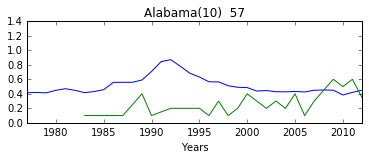

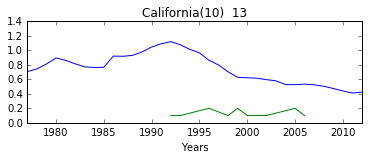

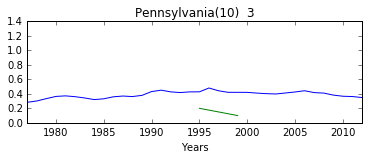

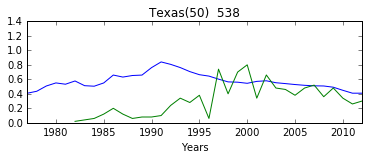

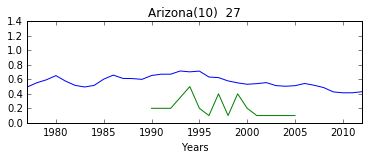

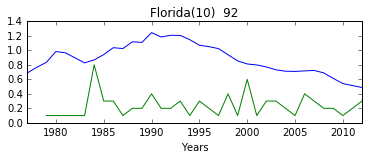

In [72]:
"author = Stijn Dirickx"


def makePlot(directory, state_tag, state_name, death_amount_factor):
    #read the data
    crime_raw_data = sc.textFile(fileDir + directory)
    crime_csv_data = crime_raw_data.map(lambda x: x.split(","))
    
    death_raw_data = sc.textFile(fileDir + EXEC_DB_DIR)
    death_csv_data = death_raw_data.map(lambda x: x.split(","))
    
    #first graph: crim rate = percentage of population that did a crime
    crime_year_data = crime_csv_data.filter(lambda l: 'Year' not in l).map(lambda x: (x[0])).collect()
    crimerate_data = crime_csv_data.filter(lambda l: 'Year' not in l).map(lambda x: (float(x[2]) / float(x[1])) * 100).collect()
    
    #second graph: deathrow data = relative data /10, make it easier to look for correlation 
    data = death_csv_data.filter(lambda l: state_tag  in l).map(lambda x: (x[0][-4:])).map(lambda x: (int(x), 1))\
    .reduceByKey(lambda x,y: x + y).sortByKey(ascending=True)
    death_year_data = data.map(lambda x: x[0]).collect()
    death_amount_data = data.map(lambda x: float(x[1])/death_amount_factor).collect()
    
    #plot the graphs
    plt.subplot(211)
    plt.title(state_name + '(' + str(death_amount_factor)+ ')  ' + str(death_csv_data.filter(lambda l: state_tag  in l).count()))
    plt.plot(crime_year_data, crimerate_data)
    plt.plot(death_year_data, death_amount_data)
    plt.axis([1977, 2012, 0, 1.4])
    plt.xlabel('Years')
    plt.show()
    
def main(sc):
    print 'Crime rate in blue, deathrow rate in green'
    print 'Convention: State(deathrow divided by) amount_of_deathrows'
    makePlot(ALAB_DB_DIR, 'AL', 'Alabama', 10)
    makePlot(CALI_DB_DIR, 'CA', 'California', 10)
    makePlot(PENN_DB_DIR, 'PA', 'Pennsylvania', 10)
    makePlot(TEXAS_DB_DIR, 'TX', 'Texas', 50)
    makePlot(ARIZ_DB_DIR, 'AR', 'Arizona', 10)
    makePlot(FLOR_DB_DIR, 'FL', 'Florida', 10)
  
main(sc)

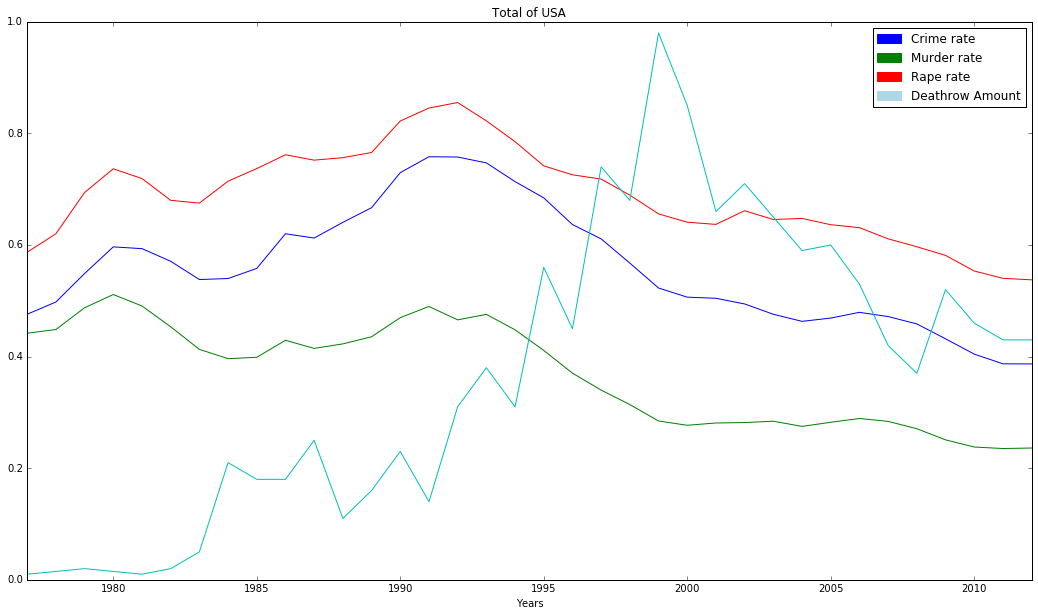

Rates come from population divided by amount of (x) and then multiplied by different factors to be shown on the same graph.
Crime is multiplied by 100, murder is multiplied by 5000, rape is multiplied by 2000.
We can conclude crime-murder-rape rates are correlated to each other.
Crime dropped heavily since 1992, and deathrow raised heavily,
But after 2000 deathrows dropped significantly, and crime rate kept dropping.


In [73]:
"Author: Stijn Dirickx"
def main(sc):
    crime_raw_data = sc.textFile(fileDir + TOTAL_DB_DIR)
    crime_csv_data = crime_raw_data.map(lambda x: x.split(","))
    death_raw_data = sc.textFile(fileDir + EXEC_DB_DIR)
    death_csv_data = death_raw_data.map(lambda x: x.split(","))
    
    crime_year_data = crime_csv_data.filter(lambda l: 'Year' not in l).map(lambda x: (x[0])).collect()
    crimerate_data = crime_csv_data.filter(lambda l: 'Year' not in l).map(lambda x: (float(x[2]) / float(x[1])) * 100).collect()
    murderrate_data = crime_csv_data.filter(lambda l: 'Year' not in l).map(lambda x: (float(x[3]) / float(x[1])) * 5000).collect()
    raperate_data = crime_csv_data.filter(lambda l: 'Year' not in l).map(lambda x: (float(x[4]) / float(x[1])) * 2000).collect()
    data = death_csv_data.map(lambda x: (x[0][-4:])).filter(lambda l: 'Date' not in l).map(lambda x: (int(x), 1)).reduceByKey(lambda x,y: x + y).sortByKey(ascending=True)
    death_year_data = data.map(lambda x: x[0]).collect()
    death_amount_data = data.map(lambda x: float(x[1])/100).collect()
    
    plt.figure(figsize=(18,10))
    plt.title('Total of USA')
    plt.plot(crime_year_data, crimerate_data)
    plt.plot(crime_year_data, murderrate_data)
    plt.plot(crime_year_data, raperate_data)
    plt.plot(death_year_data, death_amount_data)
    plt.axis([1977, 2012, 0, 1.0])
    plt.xlabel('Years')
    blue_patch = mpatches.Patch(color='blue', label='Crime rate')
    green_patch = mpatches.Patch(color='green', label='Murder rate')
    red_patch = mpatches.Patch(color='red', label='Rape rate')
    lightblue_patch = mpatches.Patch(color='lightblue', label='Deathrow Amount')
    plt.legend(handles=[blue_patch, green_patch, red_patch, lightblue_patch])
    plt.show()
    
    print 'Rates come from population divided by amount of (x) and then multiplied by different factors to be shown on the same graph.'
    print 'Crime is multiplied by 100, murder is multiplied by 5000, rape is multiplied by 2000.'
    print 'We can conclude crime-murder-rape rates are correlated to each other.'
    print 'Crime dropped heavily since 1992, and deathrow raised heavily,'
    print 'But after 2000 deathrows dropped significantly, and crime rate kept dropping.'
    
main(sc)

In [ ]:
def split(line):
    """
   Operator function for splitting a line with csv module
   """
    reader = csv.reader(StringIO(line))
    return reader.next()
 
def main(sc):
    
    deathsByElec = sc.textFile(fileDir + EXEC_DB_DIR).filter(lambda l: ELEC in l)
    deathsByInjec = sc.textFile(fileDir + EXEC_DB_DIR).filter(lambda l: INJEC in l)
    deathsByFire = sc.textFile(fileDir + EXEC_DB_DIR).filter(lambda l: FIRE in l)
    deathsByHang = sc.textFile(fileDir + EXEC_DB_DIR).filter(lambda l: HANG in l)
    deathsByGas = sc.textFile(fileDir + EXEC_DB_DIR).filter(lambda l: GAS in l)
    
    deathAsian = sc.textFile(fileDir + EXEC_DB_DIR).filter(lambda l: AS in l)
    deathBlack = sc.textFile(fileDir + EXEC_DB_DIR).filter(lambda l: BL in l)
    deathLatino = sc.textFile(fileDir + EXEC_DB_DIR).filter(lambda l: LAT in l)
    deathNative = sc.textFile(fileDir + EXEC_DB_DIR).filter(lambda l: NA in l)
    deathWhite = sc.textFile(fileDir + EXEC_DB_DIR).filter(lambda l: WH in l)
    deathOther = sc.textFile(fileDir + EXEC_DB_DIR).filter(lambda l: OT in l)
        
    makePie(deathsByElec, deathsByInjec, deathsByFire, deathsByHang, deathsByGas)
    makePieRaces(deathAsian, deathBlack, deathLatino, deathNative, deathWhite, deathOther)
 
def makePie(deathsByElec, deathsByInjec, deathsByFire, deathsByHang, deathsByGas):
    elec = deathsByElec.count()
    injec = deathsByInjec.count()
    fire = deathsByFire.count()
    hang = deathsByHang.count()
    gas = deathsByGas.count()
    labels = [ELEC, INJEC, FIRE, HANG, GAS]
    fracs = [elec, injec, fire, hang, gas]
   
    fig = plt.figure(figsize=(7, 7))
    fig.suptitle('Way of execution', fontsize=14, fontweight='bold')
    ax = fig.add_subplot(111)
    ax.pie(fracs, explode=None, labels=labels, colors=('r', 'g', 'b', 'c', 'm'), autopct='%1.2f%%', shadow=True, startangle=90)
   
    fig = plt.figure(figsize=(7, 7))
    fig.suptitle('TITLE', fontsize=14, fontweight='bold')
    ax = fig.add_subplot(111)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.bar((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),(50, 122, 133, 144, 155, 199, 50, 10, 11, 37, 11, 16) , color='red', align='center')

def makePieRaces(r1, r2, r3, r4, r5, r6):
    asian = r1.count()
    black = r2.count()
    latino = r3.count()
    native = r4.count()
    white = r5.count()
    other = r6.count()
    labels = [AS, BL, LAT, NA, WH, OT]
    fracs = [asian, black, latino, native, white, other]
 
    fig = plt.figure(figsize=(7, 7))
    fig.suptitle('Race of person', fontsize=14, fontweight='bold')
    ax = fig.add_subplot(111)
    ax.pie(fracs, explode=None, labels=labels, colors=('r', 'g', 'b', 'c', 'm', 'y'), autopct='%1.2f%%', shadow=True, startangle=90)
   
main(sc)